***Heart Failure Prediction***

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

100%|██████████| 8.56k/8.56k [00:00<00:00, 3.05MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/heart-failure-prediction/versions/1


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd
heart = pd.read_csv('/content/heart.csv')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
# Import raw data
raw_data = pd.read_csv('/content/heart.csv')
raw_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
nan_count = raw_data.isna().sum()
print(nan_count)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
print(len(heart['RestingBP'].unique()))
print(len(heart['Cholesterol'].unique()))
print(len(heart['MaxHR'].unique()))

67
222
119


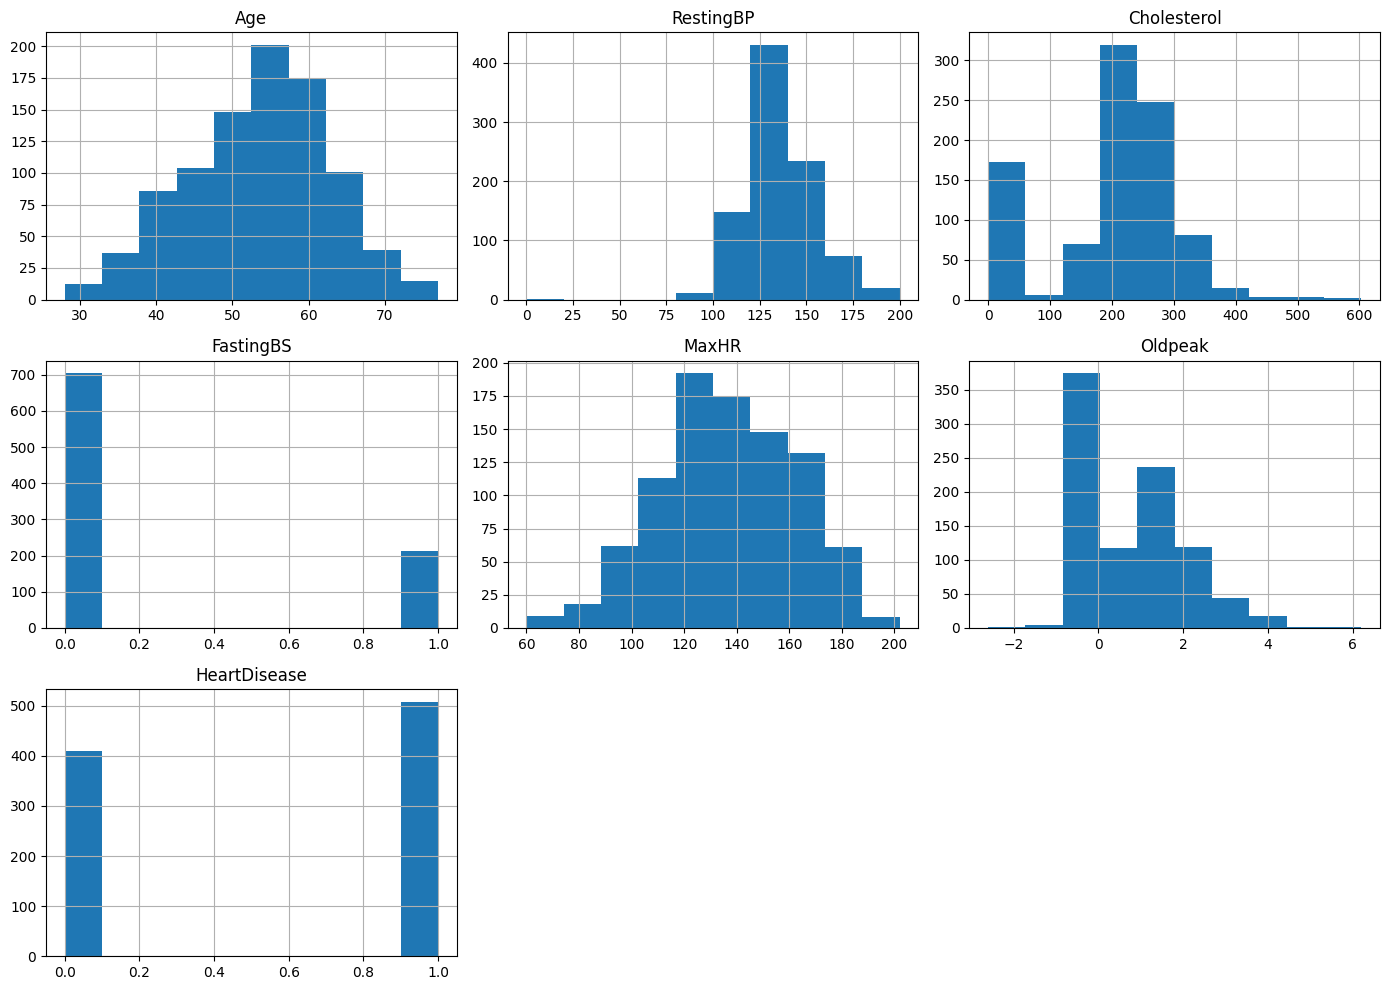

In [ ]:
raw_data.hist(figsize=(14, 10))
plt.tight_layout()

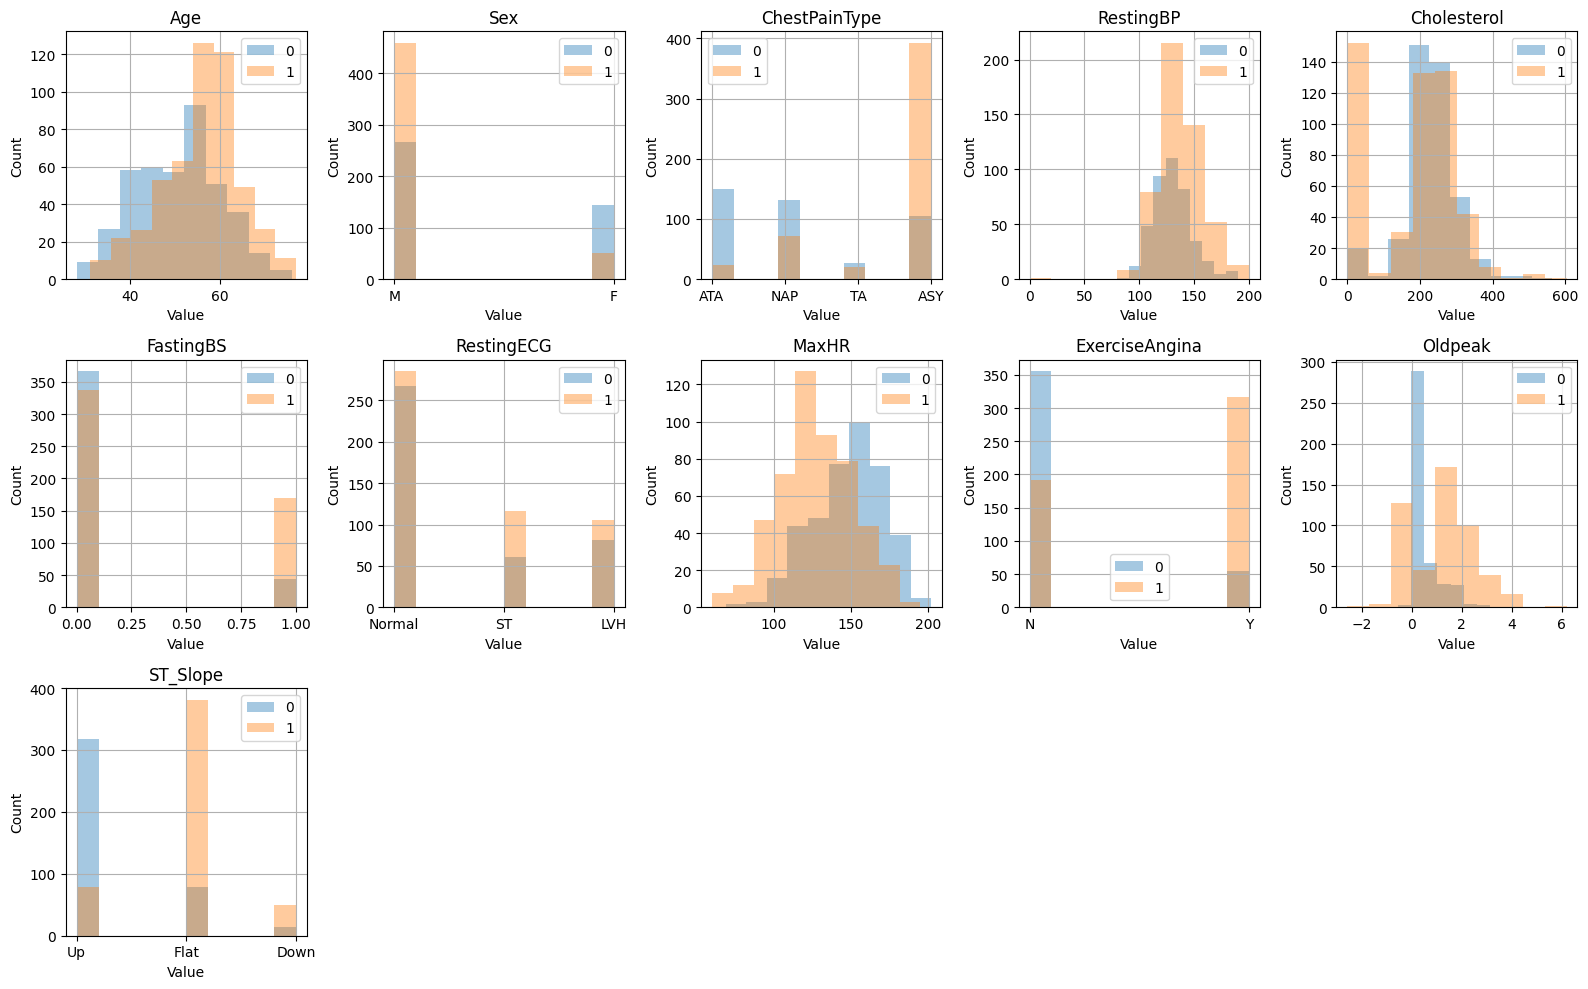

In [ ]:
fig,axes = plt.subplots(nrows=3,ncols=5,figsize=(16,10))

# loop through each column in the dataframe
for i, col in enumerate(raw_data.columns[:-1]):
    # select the appropriate subplot axis based on the index i
    ax = axes[i // 5, i % 5]
    # plot a histogram of the column for each group in 'HeartDisease'
    raw_data.groupby('HeartDisease')[col].hist(alpha=0.4, ax=ax)
    # set the title, y-axis label, and x-axis label for the subplot
    ax.set_title(col)
    ax.set_ylabel("Count")
    ax.set_xlabel("Value")
    ax.legend(raw_data['HeartDisease'])

fig.delaxes(axes[2][1])
fig.delaxes(axes[2][2])
fig.delaxes(axes[2][3])
fig.delaxes(axes[2][4])
# adjust the spacing between the subplots for better readability
plt.tight_layout()

In [ ]:
# Remove categorical features
categorical_columns= ['Sex', 'ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope' ]
X_pca = raw_data.drop(columns=categorical_columns)
y_pca = raw_data['HeartDisease']

In [ ]:
# Standardize the features since they are of different units
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_pca)

**PCA**

In [ ]:
# Using PCA
pca = PCA(n_components = 7);
pca.fit(X_standardized);

In [ ]:
# Examining the principal components
p_c = pca.fit_transform(X_standardized)
# print(principalComponents)
principal_df = pd.DataFrame(data=p_c, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
final_df = pd.concat([principal_df, y_pca],axis=1)
final_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,HeartDisease
0,-2.417053,0.508044,0.536672,0.492483,0.592140,0.263087,0.035454,0
1,0.138073,0.813523,0.245526,0.495047,1.577625,-0.012082,0.836385,1
2,-1.346575,-0.120716,-0.050249,-1.194085,0.405928,1.707199,-1.379748,0
3,0.768445,0.416296,-0.876559,-0.468257,0.780828,0.872467,-0.231420,1
4,-0.519631,0.324544,1.160150,-1.158588,0.430199,0.032315,-0.483574,0


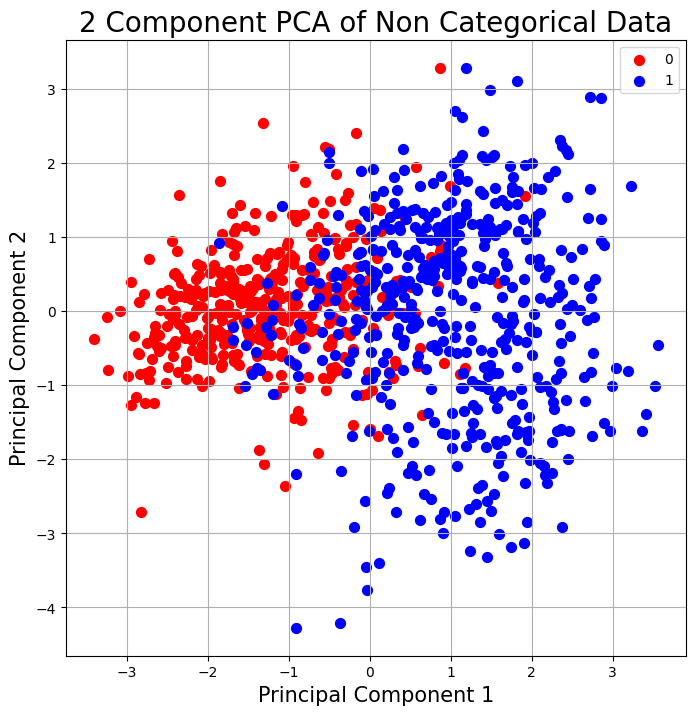

In [ ]:
# Plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA of Non Categorical Data', fontsize = 20)
targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['HeartDisease'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'PC1']
               , final_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

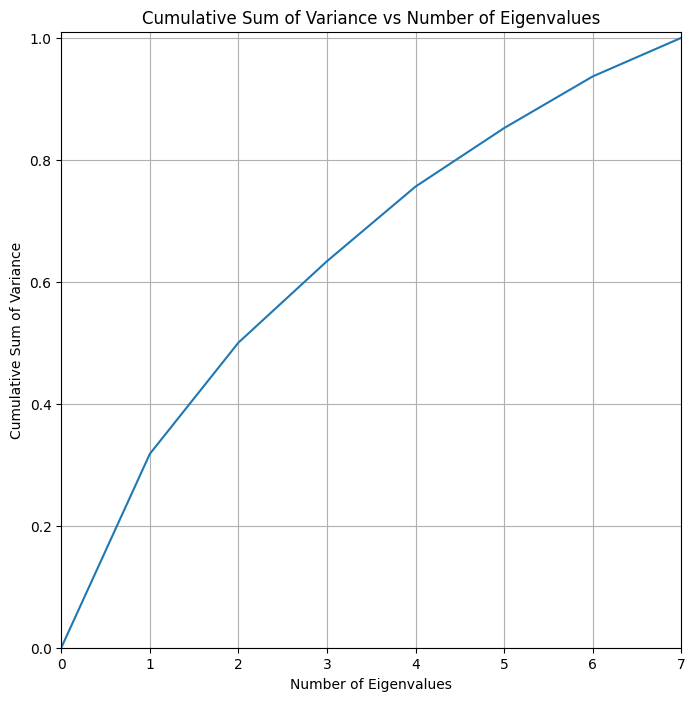

In [ ]:
## Variability of components
cum_var = pca.explained_variance_ratio_.cumsum()
cum_var=np.insert(cum_var,0,0)
k_features = list(range(0,X_pca.shape[1]+1))

# Plot figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)
ax.plot(k_features,cum_var)
# plt.rc('axes', titlesize=14)
# plt.rc('axes', labelsize=12)
ax.set_xlabel("Number of Eigenvalues")
ax.set_ylabel("Cumulative Sum of Variance")
ax.set_title("Cumulative Sum of Variance vs Number of Eigenvalues")
ax.set_xlim([0,7])
ax.set_ylim([0,1.01])
ax.grid()

In [ ]:
list(X_pca.columns)

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [ ]:
from sklearn.model_selection import train_test_split
# Use X_pca and y_pca instead of X and y
x_train, x_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size=0.25)

In [ ]:
# Data Cleaning: Remove duplicates and handle missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

**BOX PLOT AND SCATTER PLOT**

100%|██████████| 8.56k/8.56k [00:00<00:00, 8.40MB/s]

Extracting files...


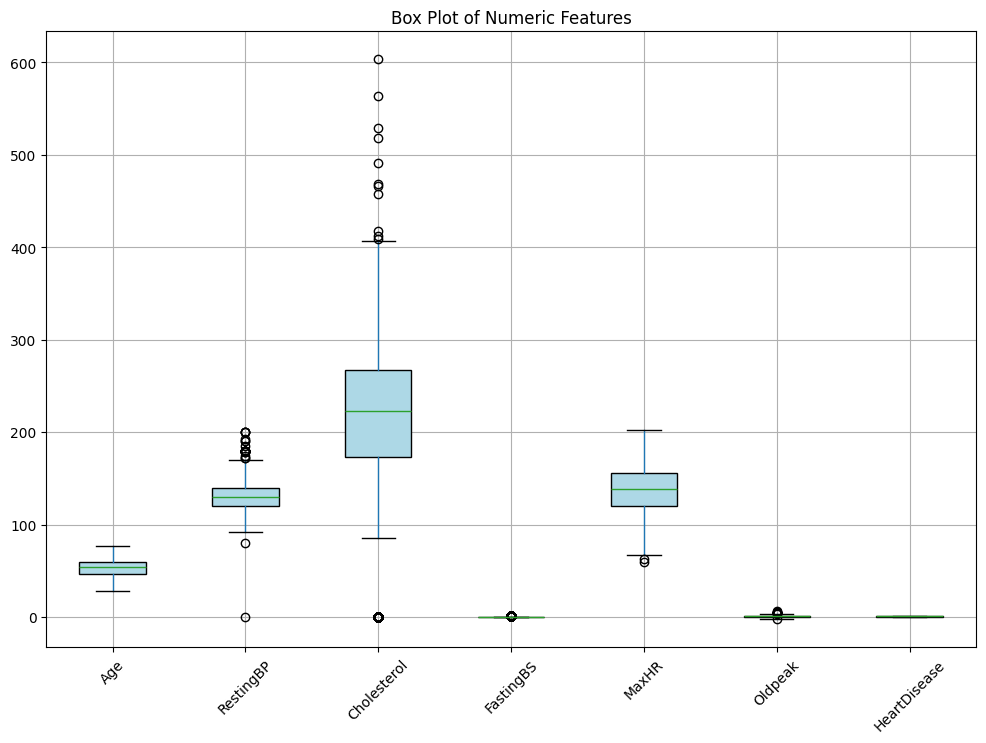

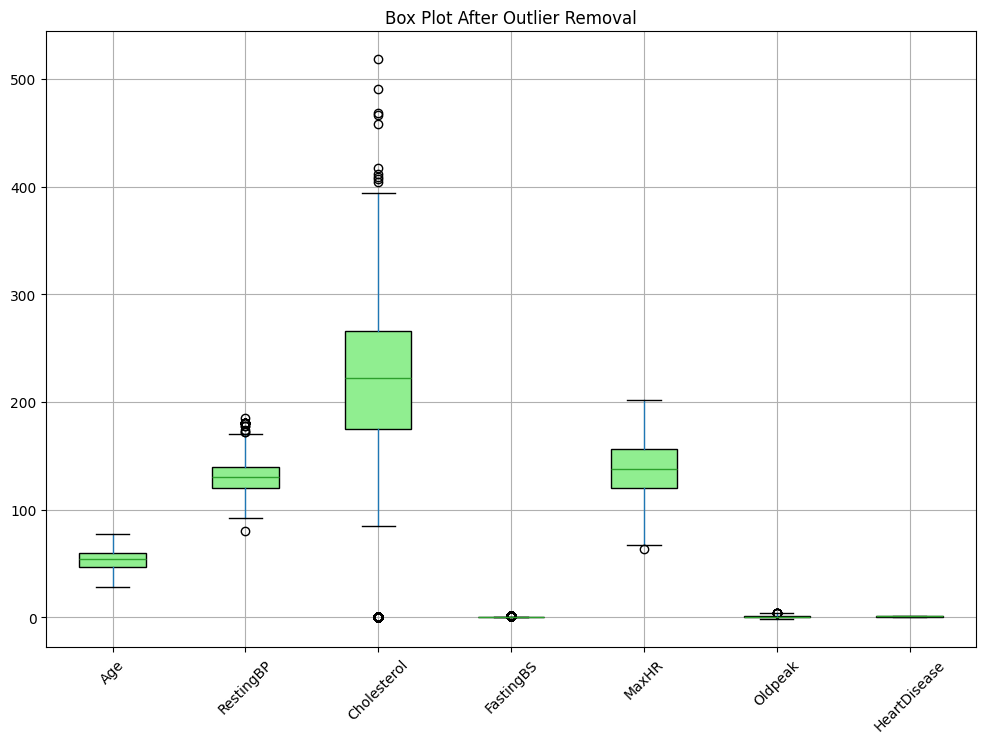

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import kagglehub

# Download dataset
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")
# The file is likely located directly within the downloaded directory, not within a 'content' subdirectory.
df = pd.read_csv(f"{path}/heart.csv") # Changed path to point to the correct location

# Data Cleaning: Remove duplicates and handle missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Define numerical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Create box plots for each numeric column
plt.figure(figsize=(12, 8))
df[numeric_columns].boxplot(rot=45, grid=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

# Remove outliers using Z-score method
z_scores = np.abs(stats.zscore(df[numeric_columns]))
df_clean = df[(z_scores < 3).all(axis=1)]

# Box plot after removing outliers
plt.figure(figsize=(12, 8))
df_clean[numeric_columns].boxplot(rot=45, grid=True, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.title("Box Plot After Outlier Removal")
plt.xticks(rotation=45)
plt.show()

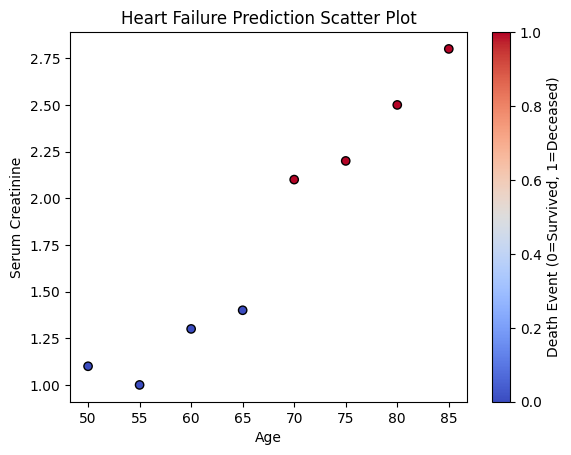

In [ ]:
import matplotlib.pyplot as plt

# Sample data (Replace with actual dataset)
age = [50, 60, 70, 80, 55, 65, 75, 85]
serum_creatinine = [1.1, 1.3, 2.1, 2.5, 1.0, 1.4, 2.2, 2.8]
death_event = [0, 0, 1, 1, 0, 0, 1, 1]  # 0 = Survived, 1 = Deceased

# Scatter plot
plt.scatter(age, serum_creatinine, c=death_event, cmap="coolwarm", edgecolors="k")

# Labels
plt.xlabel("Age")
plt.ylabel("Serum Creatinine")
plt.title("Heart Failure Prediction Scatter Plot")
plt.colorbar(label="Death Event (0=Survived, 1=Deceased)")

# Show plot
plt.show()




**CLEANING AND PREPROCESSING**

In [ ]:
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()
heart['Sex']=LE.fit_transform(heart['Sex'])
heart['ChestPainType']=LE.fit_transform(heart['ChestPainType'])
heart['RestingECG']=LE.fit_transform(heart['RestingECG'])
heart['ExerciseAngina']=LE.fit_transform(heart['ExerciseAngina'])
heart['ST_Slope']=LE.fit_transform(heart['ST_Slope'])

In [ ]:
heart_x=heart.drop(['HeartDisease'],axis=1) # input features
heart_y=heart['HeartDisease'] # output features

**Split Train and Test**

In [ ]:
#train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(heart_x,heart_y,test_size=0.3,random_state=5)

**CUSTOM DEPENDENCY FUNCTION(S)**

In [ ]:
from sklearn.metrics import confusion_matrix
def evaluation_matrix(y_test,predictions):
  cm = confusion_matrix(y_test,predictions )
  TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

  print('True Positive(TP)  = ', TP)
  print('False Positive(FP) = ', FP)
  print('True Negative(TN)  = ', TN)
  print('False Negative(FN) = ', FN)

  accuracy =  (TP+TN) /(TP+FP+TN+FN)
  print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

**LOGISTIC REGRESSION**

In [ ]:
from sklearn import linear_model
log_reg=linear_model.LogisticRegression(random_state=5,max_iter=700)
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=700, random_state=5)

Evaluation using Confusion Matrix

In [ ]:
predictions=log_reg.predict(x_test)
evaluation_matrix(y_test,predictions)

True Positive(TP)  =  143
False Positive(FP) =  18
True Negative(TN)  =  101
False Negative(FN) =  14
Accuracy of the binary classification = 0.884


**KNN**

In [ ]:
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
predictions=knn.predict(x_test)
evaluation_matrix(y_test,predictions)


True Positive(TP)  =  112
False Positive(FP) =  40
True Negative(TN)  =  79
False Negative(FN) =  45
Accuracy of the binary classification = 0.692


**SVM**


In [ ]:
#Fitting Model
from sklearn import svm
SVM=svm.SVC(random_state=5)
SVM.fit(x_train,y_train)

SVC(random_state=5)

In [ ]:
predictions=SVM.predict(x_test)
evaluation_matrix(y_test,predictions)

True Positive(TP)  =  115
False Positive(FP) =  34
True Negative(TN)  =  85
False Negative(FN) =  42
Accuracy of the binary classification = 0.725



**Decision Tree**

In [ ]:
from sklearn import tree
DT=tree.DecisionTreeClassifier(random_state=5)
DT.fit(x_train,y_train)


DecisionTreeClassifier(random_state=5)

In [ ]:
predictions=DT.predict(x_test)
evaluation_matrix(y_test,predictions)

True Positive(TP)  =  120
False Positive(FP) =  27
True Negative(TN)  =  92
False Negative(FN) =  37
Accuracy of the binary classification = 0.768


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
predictions=gnb.predict(x_test)
evaluation_matrix(y_test,predictions)

True Positive(TP)  =  143
False Positive(FP) =  16
True Negative(TN)  =  103
False Negative(FN) =  14
Accuracy of the binary classification = 0.891


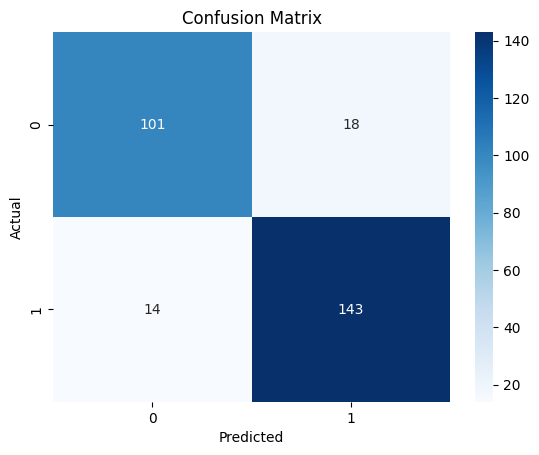

In [ ]:
import pickle
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming heart_x and heart_y are your features and target variable
# Split the data
x_train, x_test, y_train, y_test = train_test_split(heart_x, heart_y, test_size=0.3, random_state=5)

# Create and train the logistic regression model
logit = LogisticRegression(random_state=5, max_iter=700)  # Create the model instance
logit.fit(x_train, y_train) # Fit and assign to 'logit'

# Now you can save the trained model
with open('logit_regression_model.pkl', 'wb') as model_file:
    pickle.dump(logit, model_file)

# Predict on the test set and create confusion matrix
predictions = logit.predict(x_test) # Use x_test instead of test_x
conf_matrix = confusion_matrix(y_test, predictions) # Use y_test instead of test_y

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**ROC CURVE **

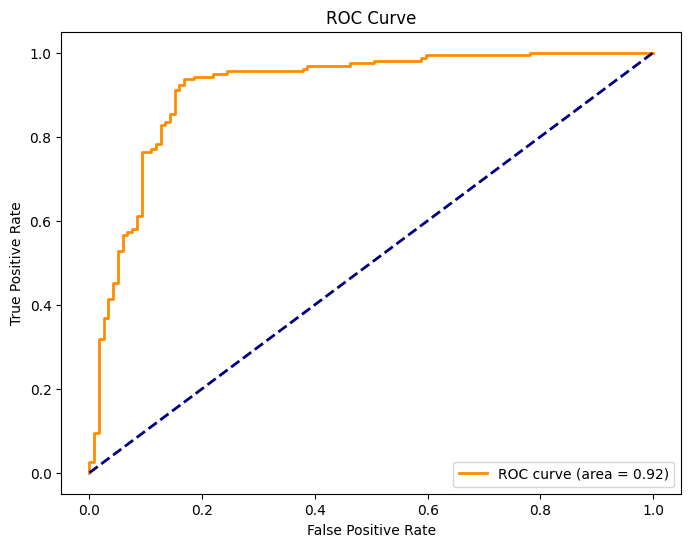

In [ ]:
from sklearn.metrics import roc_curve, auc

# Use x_test instead of test_x
probs = logit.predict_proba(x_test)[:, 1]
# Use y_test instead of test_y
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

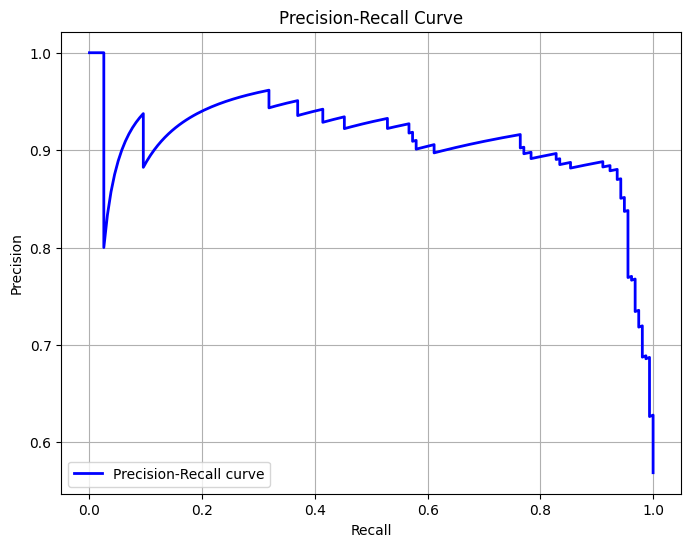

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Use y_test instead of test_y
precision, recall, _ = precision_recall_curve(y_test, probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)  # Adding grid for better readability
plt.show()

In [ ]:
# Prepare the data
X = raw_data.drop(columns=["HeartDisease"])  # Changed 'df' to 'raw_data' and "DEATH_EVENT" to "HeartDisease"
y = raw_data["HeartDisease"]  # Changed 'df' to 'raw_data' and "DEATH_EVENT" to "HeartDisease"

# One-hot encode categorical features
categorical_features = ['Sex', 'ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope']
X = pd.get_dummies(X, columns=categorical_features, drop_first=True) # drop_first avoids multicollinearity

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # Import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.875


**Kurtosis**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/heart.csv")  # Load dataset
print(df.columns)  # Show column names


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip().str.lower()  # Remove spaces, make lowercase
print(df.columns)

Index(['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs',
       'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope',
       'heartdisease'],
      dtype='object')
